In [1]:
import numpy as np
from keras import datasets
import matplotlib.pyplot as plt
from keras import Sequential
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

Using TensorFlow backend.


In [2]:
# 加载数据集
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
# 规范化
X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)
# 维度扩展
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
# 序贯模型
model = Sequential()

model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# 打印模型概况
model.summary()
# 保存模型
keras.utils.plot_model(model, to_file='model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5538816   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 5,549,226
Trainable params: 5,549,226
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 批量梯度下降
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1848 - acc: 0.9445 - val_loss: 0.0770 - val_acc: 0.9751
Epoch 2/5
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0603 - acc: 0.9812 - val_loss: 0.0560 - val_acc: 0.9818
Epoch 3/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0367 - acc: 0.9883 - val_loss: 0.0601 - val_acc: 0.9808
Epoch 4/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0241 - acc: 0.9922 - val_loss: 0.0530 - val_acc: 0.9837
Epoch 5/5
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0484 - val_acc: 0.9850


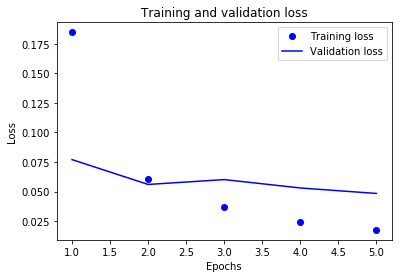

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

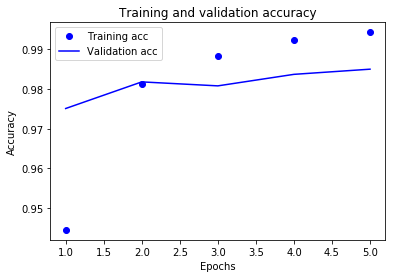

In [12]:
plt.clf()   # clear figure
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
score = model.evaluate(X_test, y_test)
print(score)

np.argmax(model.predict(x=X_train[0:1]))

10000/10000 [==============================] - 2s 199us/step
[0.04841114557342953, 0.985]


5

<img src="model.png" />